# Pymaceuticals Inc.
---

### Analysis

- Obeservations:
1) Among the 4 drugs we focused on, Capomulin and Ramicane appeared to be more effective than Infubinol and Ceftamin as the treated mice have smaller tumor size.
2) There is 1 outlier from inInfubinol treatment group with significant smaller tumor size.
3) Use mouse I509 as example, Capomulin significantly reduced its tumor size after about 20-35 days.
4) Body weight and average tumor size are positively correlated, the correlation is relative strong, coefficient 0.84.

- Potential defect:
Pie plot on male vs female mouse does not make much sense to me, because the data has multiple entries for each mouse.
I would recommend use distinct count of mouse numbers to compare male and female distribution over the entire experiment. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(mouse_study['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dup_mouse = dups['Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data_for_dup_mouse = mouse_study[mouse_study['Mouse ID'].isin (dup_mouse)]
data_for_dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_study.drop(index for index in data_for_dup_mouse.index)

clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

size_by_treat = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean = size_by_treat.mean()
median = size_by_treat.median()
var = size_by_treat.var()
std = size_by_treat.std()
sem = size_by_treat.sem()

tumor_size_stats1 = pd.concat({'Mean Tumor Volume':mean,
                        'Median Tumor Volume':median,
                        'Tumor Volume Variance':var,
                        'Tumor Volume Std. Dev.':std,
                        'Tumor Volume Std. Err.':sem}, 
                        axis=1)
tumor_size_stats1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_size_stats2 = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

tumor_size_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

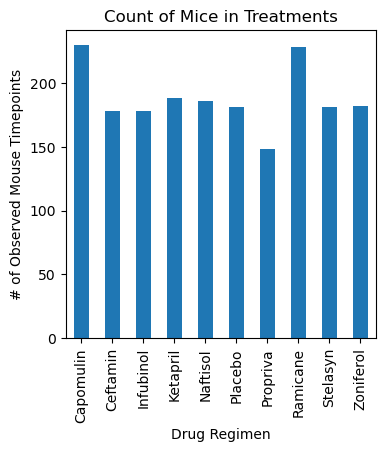

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data = clean_data.groupby('Drug Regimen')['Mouse ID'].count()

bar_data.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', figsize=(4,4))
plt.title('Count of Mice in Treatments')

plt.show()

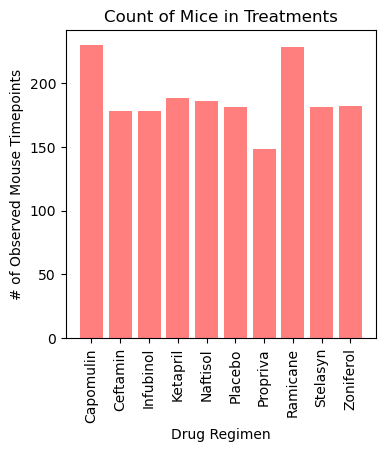

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(4,4))
plt.bar(bar_data.index, bar_data, color='r', alpha=.5)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Count of Mice in Treatments')
plt.xticks(rotation=90)
plt.show()

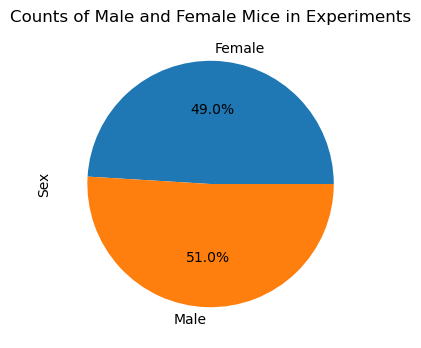

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_cnt = clean_data.groupby('Sex')['Mouse ID'].count()

sex_cnt.plot(kind='pie', y='Mouse ID', ylabel='Sex', legend=False, autopct='%.1f%%', figsize=(4,4))
plt.title('Counts of Male and Female Mice in Experiments')

plt.show()


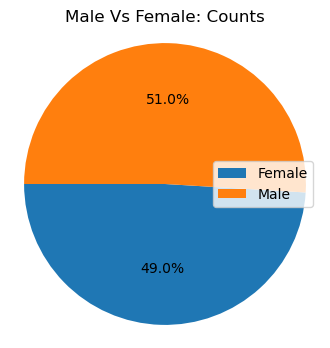

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(4,4))
plt.pie(sex_cnt,  startangle=180, autopct='%.1f%%')
plt.title('Male Vs Female: Counts')
plt.legend(sex_cnt.index, loc='center right')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_last_tmpt = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_size = pd.merge(mouse_last_tmpt, clean_data, on=['Mouse ID','Timepoint'])
tumor_size = tumor_size.set_index(['Mouse ID','Timepoint'])
tumor_size

,,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,Timepoint,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,30.638696,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volumes, outliers = [], []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    volume = tumor_size[tumor_size['Drug Regimen']==drug]['Tumor Volume (mm3)']
    volumes.append(volume)    # add subset 
    
    # Determine outliers using upper and lower bounds
for volume in volumes:
    QTS = volume.quantile([.25,.5,.75])
    Q1, Q3 = QTS[.25], QTS[.75]
    IQR = Q3-Q1
    outlier = [v for v in volume if v>(Q3+1.5*IQR) or v<(Q1-1.5*IQR)]
    outliers.append(outlier)

# print result
for i in range(0, 4):
    print(f'{drugs[i]}\'s potential outliers of last Tumor size (mm3)): {outliers[i]}')    

Capomulin's potential outliers of last Tumor size (mm3)): []
Ramicane's potential outliers of last Tumor size (mm3)): []
Infubinol's potential outliers of last Tumor size (mm3)): [36.3213458]
Ceftamin's potential outliers of last Tumor size (mm3)): []


<Figure size 400x600 with 0 Axes>

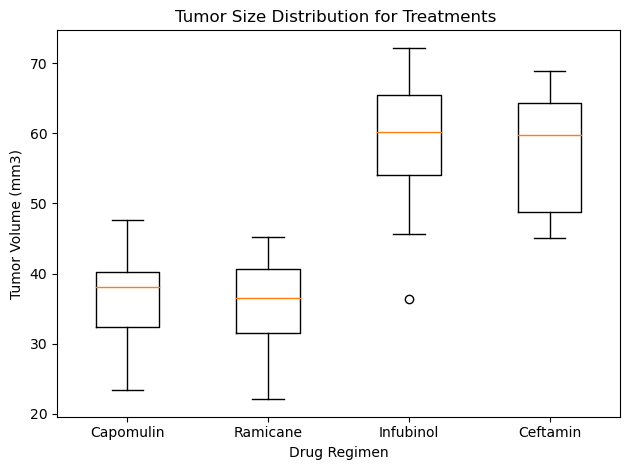

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(4,6))
fig, ax = plt.subplots()
ax.boxplot(volumes)
x_loc = np.arange(len(drugs)) + 1
plt.xticks(x_loc, drugs)
plt.title('Tumor Size Distribution for Treatments ')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.tight_layout()

plt.show()

## Line and Scatter Plots

In [34]:
# get data of given mouse id
mouse = 'l509'
line_data = clean_data[clean_data['Mouse ID']==mouse]
# verify treament
print(line_data['Drug Regimen'].unique())

['Capomulin']


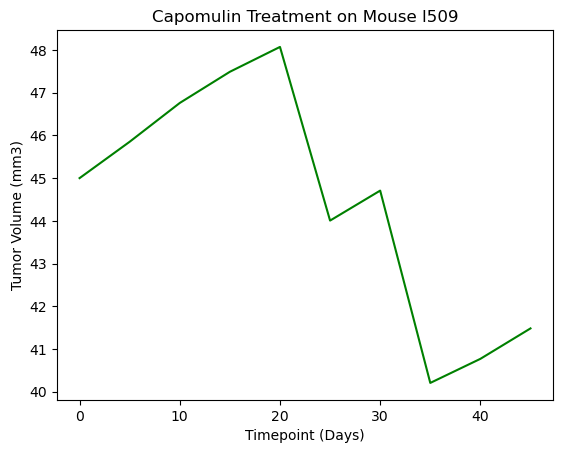

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(line_data['Timepoint'], line_data['Tumor Volume (mm3)'], color='g')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment on Mouse l509')

plt.show()

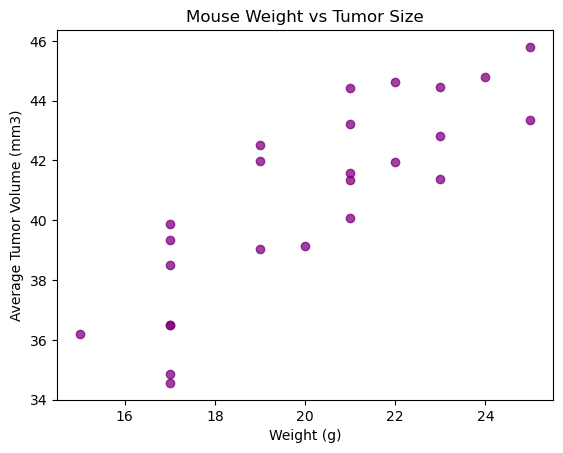

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# get data, group by mosue
scatter_grp = clean_data[clean_data['Drug Regimen']=='Capomulin'].groupby('Mouse ID')

# get x and y axis
weight = scatter_grp['Weight (g)'].max()
avg_size = scatter_grp['Tumor Volume (mm3)'].mean()

# plot, set labels
plt.scatter(weight, avg_size, color='purple', alpha=.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Size')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


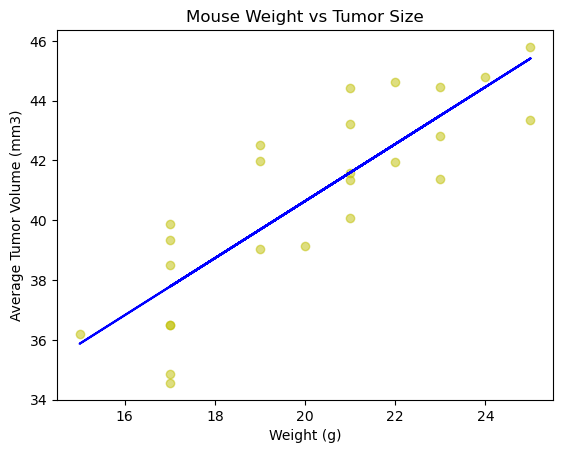

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = weight
y_values = avg_size

# calculate correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

# replot scatter and add linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values, color='y', alpha=.5)
plt.plot(x_values,regress_values,"b-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Size')

plt.show()